### Ajuste de curvas

#### Datos originales

In [1]:
using PyPlot

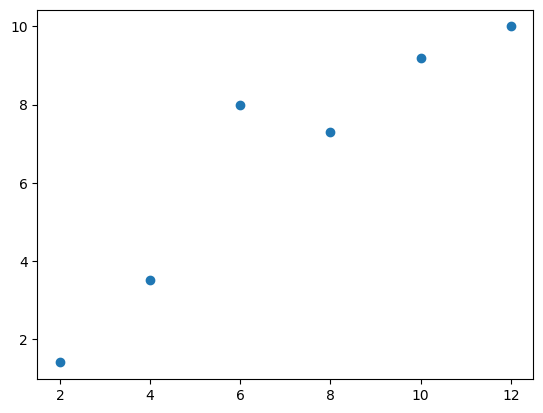

PyObject <matplotlib.collections.PathCollection object at 0x0000000058A6B700>

In [2]:
x = [2 4 6 8 10 12]
y = [1.4 3.5 8.0 7.3 9.2 10.0]
scatter(x, y)

#### Regresión por mínimos cuadrados

$$y=ax+b$$
$$a = \frac{N\sum{x_iy_i}-\sum{x_i}\sum{y_i}}{N\sum{x_i^2}-{(\sum{x_i})^2}}$$
$$b=\frac{N\sum{x_i^2}\sum{y_i}-\sum{x_i}\sum{x_iy_i}}{N\sum{x_i^2}-{(\sum{x_i})^2}}$$
$$r = \frac{xy-xy}{\sqrt{x^2 - (x)^2} \cdot \sqrt{y^2 - (y)^2}}$$

In [3]:
# Numero de elementos totales
N = length(x)


6

Inicializadores

In [4]:
suma_x = 0
suma_y = 0
suma_xy = 0
suma_x2 = 0
suma_y2 = 0

0

Acumulador

In [5]:
for i=1:N
    global suma_x = suma_x + x[i]
    global suma_y = suma_y + y[i]
    global suma_xy = suma_xy + x[i]*y[i]
    global suma_x2 = suma_x2 + x[i]^2
    global suma_y2 = suma_y2 + y[i]^2
end

Ecuacion de coeficientes a y b

In [6]:
a = (N*suma_xy - suma_x*suma_y)/(N*suma_x2 - suma_x^2)
b = (suma_x2*suma_y - suma_x*suma_xy)/(N*suma_x2 - suma_x^2)

0.6266666666666684

In [7]:
println("a = ", a)
println("b = ", b)

a = 0.8485714285714282
b = 0.6266666666666684


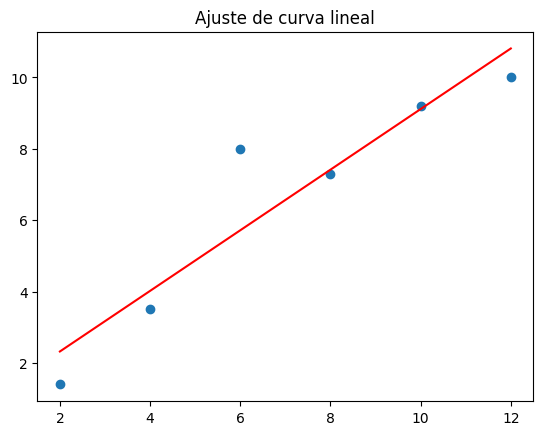

PyObject Text(0.5, 1.0, 'Ajuste de curva lineal')

In [8]:
yn = []
for i=1:N
    append!(yn, a*x[i]+b)
end
scatter(x, y)
# Convirtiendo vector x a una matrix x
plot(transpose(x), yn, "r")
title("Ajuste de curva lineal")

$$r = \frac{xy-xy}{\sqrt{x^2 - (x)^2} \cdot \sqrt{y^2 - (y)^2}}$$

In [9]:
x_media = suma_x/N
y_media = suma_y/N
xy_media = suma_xy/N
x2_media = suma_x2/N
y2_media = suma_y2/N

52.69

In [10]:
r = (xy_media - x_media*y_media)/(√(x2_media - x_media^2)*√(y2_media - y_media^2))

0.9369815599217882

In [11]:
println("Modelo lineal")
println(" y = ", a, "x ", b)

Modelo lineal
 y = 0.8485714285714282x 0.6266666666666684


Función generada

In [10]:
function RegresionLineal(x, y)
    N = length(x)
    suma_x = 0 # Inicializadores 
    suma_y = 0
    suma_xy = 0
    suma_x2 = 0
    suma_y2 = 0
    for i=1:N # Acumuladores
        suma_x = suma_x + x[i]
        suma_y = suma_y + y[i]
        suma_xy = suma_xy + x[i]*y[i]
        suma_x2 = suma_x2 + x[i]^2
        suma_y2 = suma_y2 + y[i]^2
    end 
    # Coeficientes y = ax + b
    a = (N*suma_xy - suma_x*suma_y)/(N*suma_x2 - suma_x^2)
    b = (suma_x2*suma_y - suma_x*suma_xy)/(N*suma_x2 - suma_x^2)
    yn = []
    for i=1:N
        append!(yn, a*x[i]+b)
    end
    # Calculo del ajuste r
    x_media = suma_x/N
    y_media = suma_y/N
    xy_media = suma_xy/N
    x2_media = suma_x2/N
    y2_media = suma_y2/N
    r = (xy_media - x_media*y_media)/(√(x2_media - x_media^2)*√(y2_media - y_media^2))
    # Convirtiendo vector x a una matrix x
    scatter(x, y)
    plot(transpose(x), yn, "r")
    title("Ajuste de curva lineal")
    println(" y = ", a, "x ", b)
end

RegresionLineal (generic function with 1 method)

 y = 0.8485714285714282x 0.6266666666666684


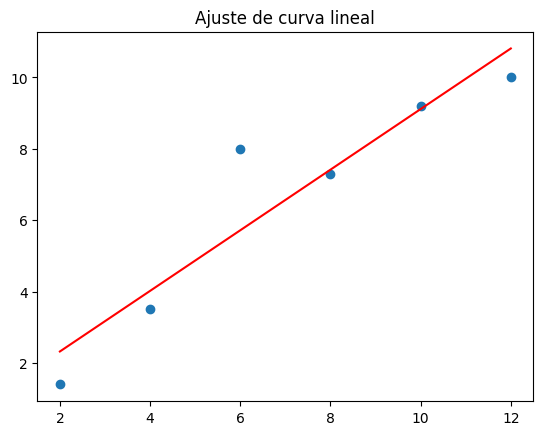

In [11]:
RegresionLineal(x,y)

#### Modelo exponencial

$$y = ax + b$$
$$ln (y) = a \cdot ln (x) + b$$
$$e^{ln(y)} = e^{ln(x^n)+b}$$
$$y = e^bx^a$$

In [12]:
#Reestructurar como una función
ln_y = []
ln_x = []

suma_x = 0
suma_y = 0
suma_xy = 0
suma_x2 = 0
suma_y2 = 0

for i=1:N
    append!(ln_x, log(x[i]))
    append!(ln_y, log(y[i]))
    global suma_x = suma_x + ln_x[i]
    global suma_y = suma_y + ln_y[i]
    global suma_xy = suma_xy + ln_x[i]*ln_y[i]
    global suma_x2 = suma_x2 + ln_x[i]^2
    global suma_y2 = suma_y2 + ln_y[i]^2
end
println(ln_x)
println(ln_y)

Any[0.6931471805599453, 1.3862943611198906, 1.791759469228055, 2.0794415416798357, 2.302585092994046, 2.4849066497880004]
Any[0.3364722366212129, 1.252762968495368, 2.0794415416798357, 1.9878743481543455, 2.2192034840549946, 2.302585092994046]


In [13]:
a = (N*suma_xy - suma_x*suma_y)/(N*suma_x2 - suma_x^2)
b = (suma_x2*suma_y - suma_x*suma_xy)/(N*suma_x2 - suma_x^2)
println("a = ", a)
println("exp(b) = ", exp(b))

a = 1.1136513127493066
exp(b) = 0.743267246090773


$$y = e^bx^a$$

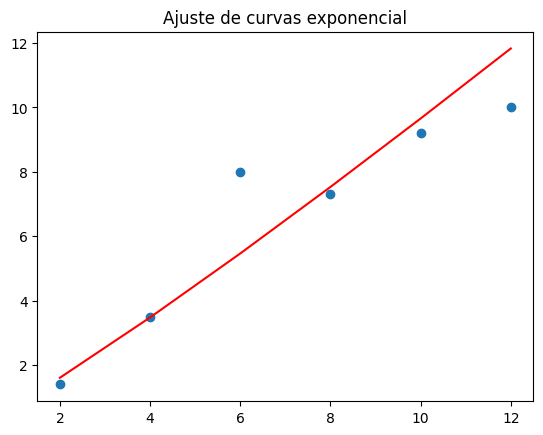

PyObject Text(0.5, 1.0, 'Ajuste de curvas exponencial')

In [14]:
yn = []
for i = 1:N
    append!(yn, exp(b)*x[i]^a)
end
scatter(x, y)
plot(transpose(x), yn, "r")
title("Ajuste de curvas exponencial")

In [15]:
x_media = suma_x/N
y_media = suma_y/N
xy_media = suma_xy/N
x2_media = suma_x2/N
y2_media = suma_y2/N

3.3641853974473848

In [16]:
r = (xy_media - x_media*y_media)/(√(x2_media - x_media^2)*√(y2_media - y_media^2))

0.9658751318415034

In [17]:
println("Modelo exponencial")
println(" y = ", exp(b), "x^", a)

Modelo exponencial
 y = 0.743267246090773x^1.1136513127493066


Función generada

In [8]:
function RegresionExponencial(x, y)
    N = length(x)
    ln_y = []
    ln_x = []
    suma_x = 0
    suma_y = 0
    suma_xy = 0
    suma_x2 = 0
    suma_y2 = 0
    for i=1:N # Acumuladores
        append!(ln_x, log(x[i]))
        append!(ln_y, log(y[i]))
        suma_x = suma_x + ln_x[i]
        suma_y = suma_y + ln_y[i]
        suma_xy = suma_xy + ln_x[i]*ln_y[i]
        suma_x2 = suma_x2 + ln_x[i]^2
        suma_y2 = suma_y2 + ln_y[i]^2
    end 
    # Coeficientes y = ax + b
    a = (N*suma_xy - suma_x*suma_y)/(N*suma_x2 - suma_x^2)
    b = (suma_x2*suma_y - suma_x*suma_xy)/(N*suma_x2 - suma_x^2)
    yn = []
    for i = 1:N
        append!(yn, exp(b)*x[i]^a)
    end
    # Calculo del ajuste r
    x_media = suma_x/N
    y_media = suma_y/N
    xy_media = suma_xy/N
    x2_media = suma_x2/N
    y2_media = suma_y2/N
    r = (xy_media - x_media*y_media)/(√(x2_media - x_media^2)*√(y2_media - y_media^2))
    scatter(x, y)
    plot(transpose(x), yn, "r")
    title("Ajuste de curvas exponencial")
    println(" y = ", exp(b), "x^", a)
end

RegresionExponencial (generic function with 1 method)

 y = 0.743267246090773x^1.1136513127493066


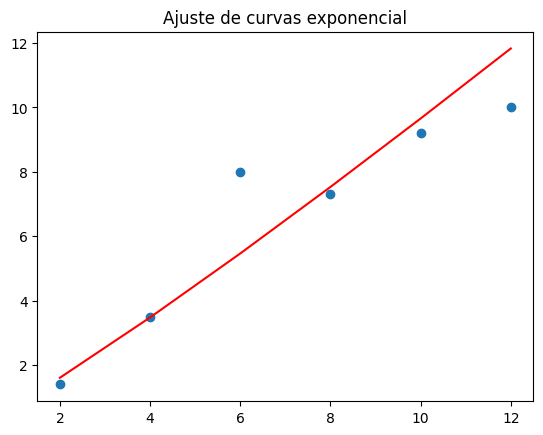

In [9]:
RegresionExponencial(x,y)

Aunque el modelo exponencial arroja la mejor correlación $r$, el modelo lineal resulta más sencillo de manipular matematicamente. Por lo tanto, dependiendo del problema manejado, nuestro criterio nos hará decidir por usar uno u otro modelo

#### Modelo polinomico de segundo orden

Libreria externa: roots.jl

Para poder resolver una regresión polinomica de segundo orden es necesario realizar una eliminación gaussiana

Eliminación gaussiana